<a href="https://colab.research.google.com/github/yfaleiro/RFM/blob/main/DataClean%26Wrang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepararando um dataset para modelagem de dados
Yuri Faleiro

Trabalho requisitado para o desafio de número 5 da formação em Dados da escola DNC

---
##Objetivo

Analisar base de dados de uma empresa do ramo de e-commerce e calclar os indicadores de RFM (Recência, Frequencia e Ticket Médio. O output desse trabalho deve ser um arquivo também em .csv, porem constando apenas a identificação do cliente e as métricas de RFM.
Para chegar ao objetivo, faremos os processos de data cleaning, tratando nulos, duplicados e outliers, antes de partimos para o data wrangling, onde calcularemos o RFM e os insiriremos no output final da base de dados.

##Disclaimer

Foi informado pelo cliente hipotético que valores faltantes na identificação do cliente deverão ser removidos. Além disso, valores negativos em preço unitário (UnitPrice) e quantidade (Quantity) também deverão ser removidos. Linhas duplicadas também deverão ser removidas visto que é muito improvavel que o mesmo cliente faça um pedido identico em valor e quantidade na mesmo dia e hora.

Além disso, foi solicitado para que os outliers sejam considerados como erro e removidos da base, sendo considerado como outlier dados em que a quantidade é acima de 10.000 e o preço unitário é maior que 5.000.


Descrição dos dados

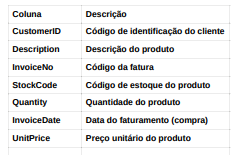

#Preparação

In [280]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [281]:
#Importando a base de dados
df = pd.read_csv("data.csv", encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#Etapa 01

In [282]:
#Checando informações sobre as features da base de dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


A partir do *describe()* acima podemos identificar já de imediato, que pela contagem de dados, a coluna *CustomerID* tem mais de 100 mil dados faltantes.

Além disso é possível identificar que tanto a quantidade quanto o preço unitário possuem valores negativos, o que não faz sentido, então deverão ser removidos.

In [283]:
#Checando os tipos dos dados
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

A partir da descrição acima é possível identificar que a variável *InvoiceDate* não está no formato data, então precisará ser corrigida. Além disso, o *CustomerID*, apesar de ser um número, é apenas uma identificação, então deve estar no formado de número inteiro, visto que um número de identificação não terá valores decimais.

#Etapa 02

In [284]:
#Checando por valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [285]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [286]:
#Dropando linhas que o *CustomerID* é nulo
df = df.dropna(subset='CustomerID')

In [287]:
#Check se foi removido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Apesar de haver valores nulos também na coluna *Description*, ao remover os valores nulos  do *CustomerID*, todas as colunas estão com o mesmo número de observações.

#Etapa 03

In [288]:
#Contando quantas linhas de dados tem o preço ou a quantidade em valores negativos
df.query('UnitPrice <= 0 or Quantity <= 0').count()

InvoiceNo      8945
StockCode      8945
Description    8945
Quantity       8945
InvoiceDate    8945
UnitPrice      8945
CustomerID     8945
Country        8945
dtype: int64

In [289]:
#Removendo valores negativos nas colunas de preço e quantidade
df = df.query('UnitPrice > 0 & Quantity > 0')
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Conforme visto no primeiro *describe()* que fizemos, os valores mínimos de quantidade e preço eram negativos, o que não fazia sentido, então, removemos esses valores da base de dados.

#Etapa 04

In [290]:
#Checando por linhas duplicadas
df.duplicated().sum()

5192

In [291]:
#Excluindo linhas duplicadas
df_clean = df.drop_duplicates()

#Etapa 05

In [292]:
#Corrigindo o tipo de dado de *CustomerID* e *InvoiceDate* conforme apurado anteriormente
df_clean['CustomerID'] = df_clean['CustomerID'].astype('int')
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

<ipython-input-292-a6183e0d0ec8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CustomerID'] = df_clean['CustomerID'].astype('int')
<ipython-input-292-a6183e0d0ec8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])


In [293]:
#Checando transformações
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [294]:
#Revisitando base para certificar se tudo está correto
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


#Etapa 06

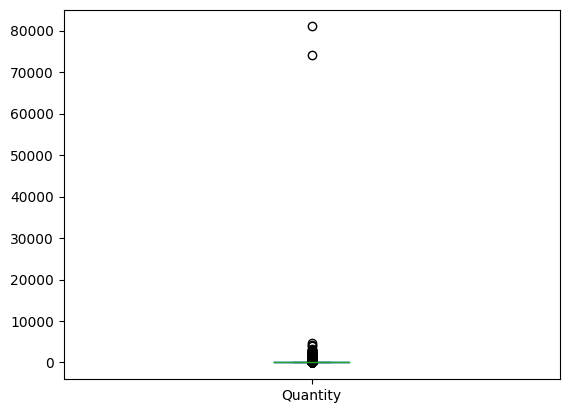

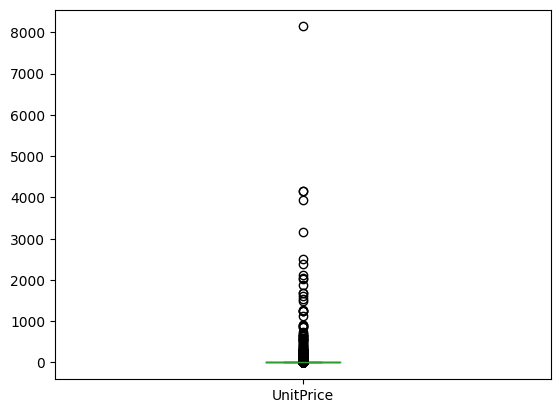

In [295]:
#Visualizando outliers
df_clean[['Quantity']].plot.box();
df_clean[['UnitPrice']].plot.box();

Conforme apontado no início, o cliente pediu para remover qualquer dado onde a quantidade é acima de 10.000 ou o preço unitário é maior que 5.000. Em cada uma das variáveis identificamos apenas um valor, que vamos remover abaixo.

In [296]:
df_clean = df_clean.query('Quantity < 10000 & UnitPrice < 5000')

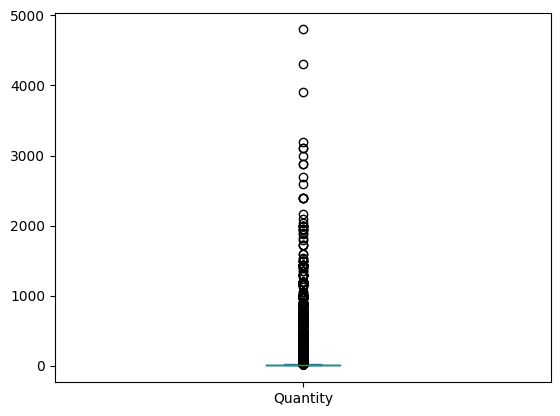

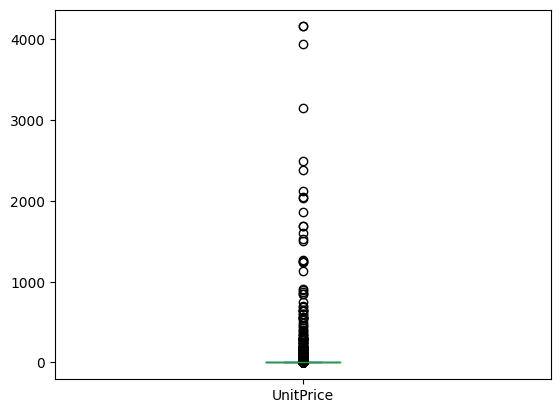

In [297]:
#Testando se os valores foram removidos
df_clean[['Quantity']].plot.box();
df_clean[['UnitPrice']].plot.box();

#Etapa 07

In [298]:
#Criando coluna de valor total (quantidade multiplicado pelo valor unitário)
df_clean['TotalValue'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean

<ipython-input-298-5d4c8dbc43e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalValue'] = df_clean['Quantity'] * df_clean['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#Etapa 08

In [299]:
#Criando uma nova coluna que traga a Recência, (R em RFM), que significa a diferença em dias da última compra do cliente até a ultima data disponível na base de dados
df_clean['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [300]:
df_clean['Recency'] = (df_clean['InvoiceDate'] - df_clean['InvoiceDate'].max()).dt.days
df_clean

<ipython-input-300-9ebf6ccb0d20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Recency'] = (df_clean['InvoiceDate'] - df_clean['InvoiceDate'].max()).dt.days


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,-374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,-374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,-374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,-374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,-374
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0


#Etapa 09

In [301]:
#Plotando gráfico dos top 10 países com maior valor em vendas
graph1 = df_clean.groupby(['Country'])[['TotalValue']].sum()
graph1 = graph1.sort_values(by='TotalValue', ascending=False)
graph1['TotalValue'] = graph1['TotalValue'].round(2)
graphtop10val = graph1[:10].reset_index()
graphtop10val

,Country,TotalValue
0,United Kingdom,7031228.69
1,Netherlands,285446.34
2,EIRE,265262.46
3,Germany,228678.40
4,France,208934.31
5,Australia,138453.81
6,Spain,61558.56
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38367.83


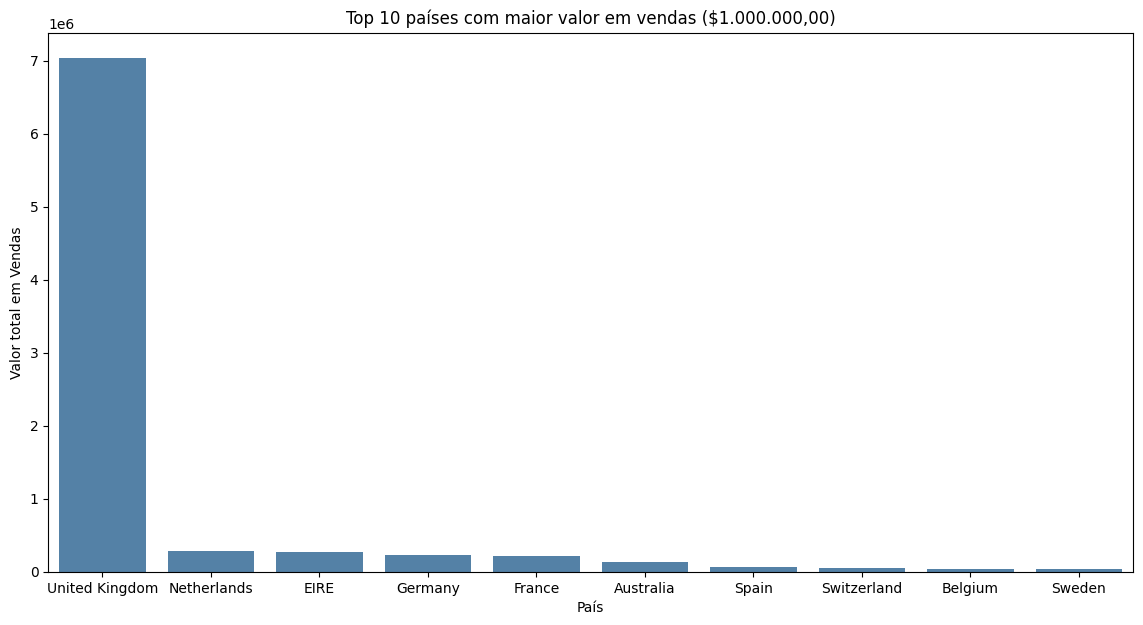

In [302]:
# Criar o gráfico de barras usando Seaborn
fig = plt.figure(figsize=(14,7))

sns.barplot(data=graphtop10val, x='Country', y='TotalValue', color='steelblue')

# Adicionar rótulos ao gráfico
plt.title('Top 10 países com maior valor em vendas ($1.000.000,00)')
plt.xlabel('País')
plt.ylabel('Valor total em Vendas')
fig
# Exibir o gráfico
plt.show()

In [303]:
#Plotando o gráfico dos top 10 produtos mais vendidos
graph2 = df_clean.groupby(['Description'])[['TotalValue']].sum()
graph2 = graph2.sort_values(by='TotalValue', ascending=False)
graph2['TotalValue'] = graph2['TotalValue'].round(2)
graphtop10prod = graph2[:10].reset_index()
graphtop10prod

,Description,TotalValue
0,REGENCY CAKESTAND 3 TIER,142264.75
1,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
2,JUMBO BAG RED RETROSPOT,85040.54
3,POSTAGE,69661.21
4,PARTY BUNTING,68785.23
5,ASSORTED COLOUR BIRD ORNAMENT,56413.03
6,Manual,53419.93
7,RABBIT NIGHT LIGHT,51251.24
8,CHILLI LIGHTS,46265.11
9,PAPER CHAIN KIT 50'S CHRISTMAS,42584.13


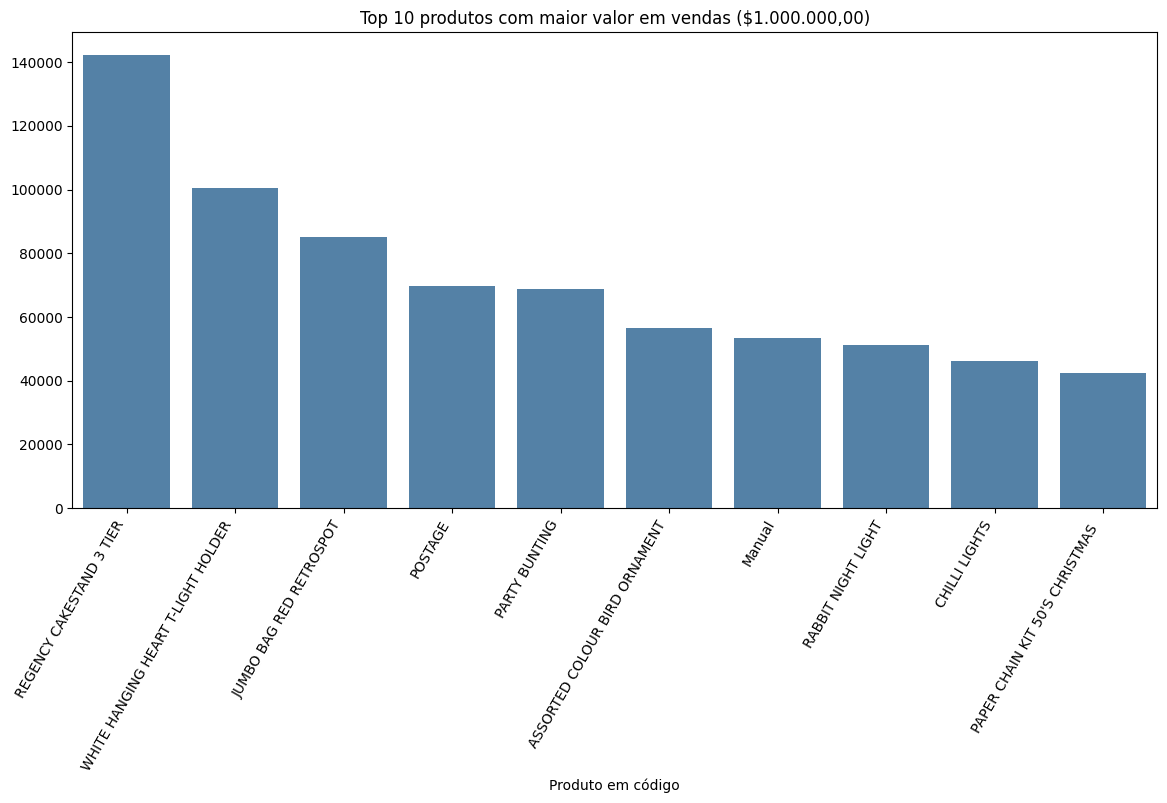

In [304]:
# Criar o gráfico de barras usando Seaborn
fig = plt.figure(figsize=(14,7))

sns.barplot(data=graphtop10prod, x='Description', y='TotalValue', color='steelblue')

# Adicionar rótulos ao gráfico
plt.title('Top 10 produtos com maior valor em vendas ($1.000.000,00)')
plt.xlabel('Produto em código')
plt.ylabel('')
fig

fig.autofmt_xdate(rotation=60, ha='right')

# Exibir o gráfico
plt.show()

In [305]:
#Plotando o gráfico do valor de venda total por mês
df_clean['MesAno'] = df_clean['InvoiceDate'].dt.to_period('M')
graph3 = df_clean.groupby(['MesAno'])[['TotalValue']].sum().reset_index()
graph3['TotalValue'] = graph3['TotalValue'].round(2)
graph3

<ipython-input-305-c686949bd172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MesAno'] = df_clean['InvoiceDate'].dt.to_period('M')


,MesAno,TotalValue
0,2010-12,570422.73
1,2011-01,490917.71
2,2011-02,446084.92
3,2011-03,594081.76
4,2011-04,468374.33
5,2011-05,669212.40
6,2011-06,660046.05
7,2011-07,598962.90
8,2011-08,644051.04
9,2011-09,950690.20


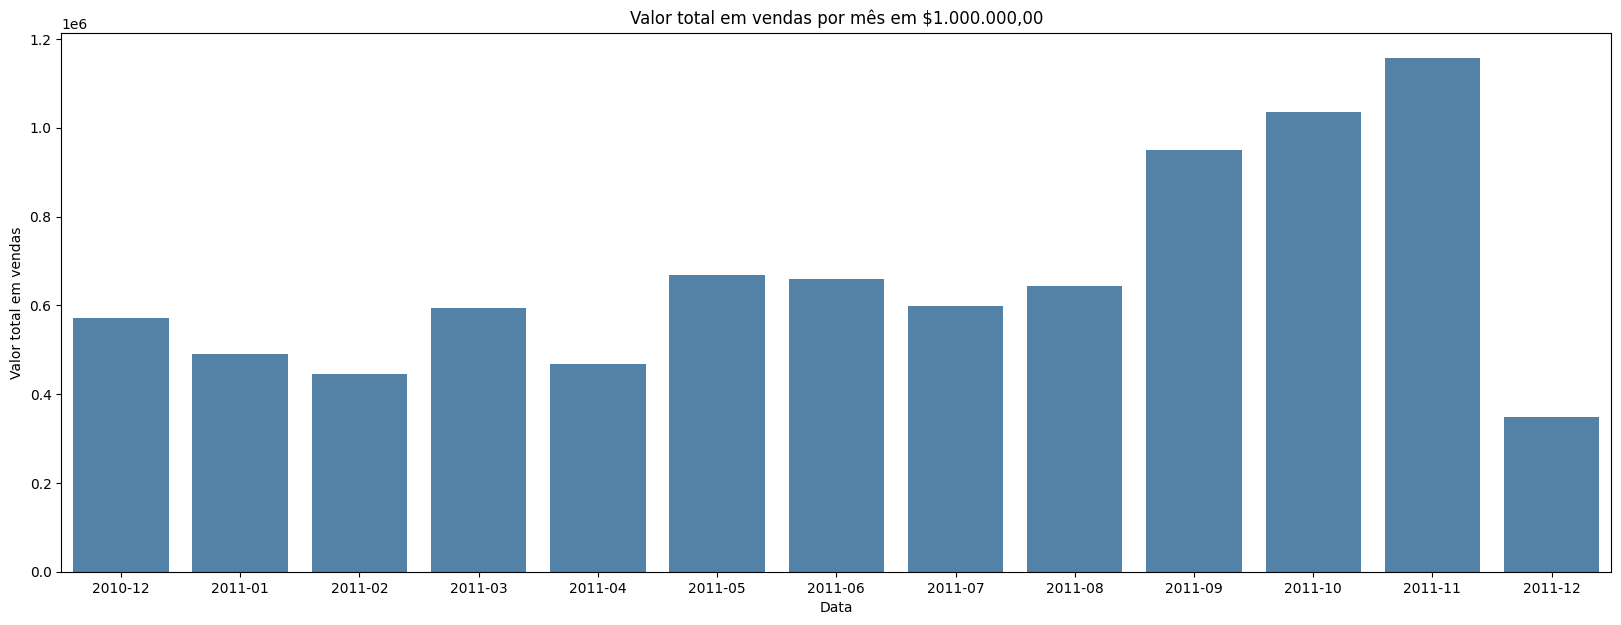

In [306]:
# Criar o gráfico de barras usando Seaborn
fig = plt.figure(figsize=(20,7))

sns.barplot(data=graph3, x='MesAno', y='TotalValue', color='steelblue')

# Adicionar rótulos ao gráfico
plt.title('Valor total em vendas por mês em $1.000.000,00')
plt.xlabel('Data')
plt.ylabel('Valor total em vendas')
fig

# Exibir o gráfico
plt.show()

In [307]:
#Plotando o gráfico do valor de venda total por mês e por país
graph4 = df_clean.groupby(['MesAno', 'Country'])[['TotalValue']].sum().reset_index()
graph4['TotalValue'] = graph4['TotalValue'].round(2)
top10_country_list = graphtop10val['Country']

graph4 = graph4[graph4['Country'].isin(top10_country_list)]
graph4

,MesAno,Country,TotalValue
0,2010-12,Australia,965.35
2,2010-12,Belgium,1809.91
6,2010-12,EIRE,8813.88
8,2010-12,France,9616.31
9,2010-12,Germany,15205.74
...,...,...,...
276,2011-12,Germany,7984.17
280,2011-12,Netherlands,11728.02
283,2011-12,Spain,316.21
284,2011-12,Sweden,238.00


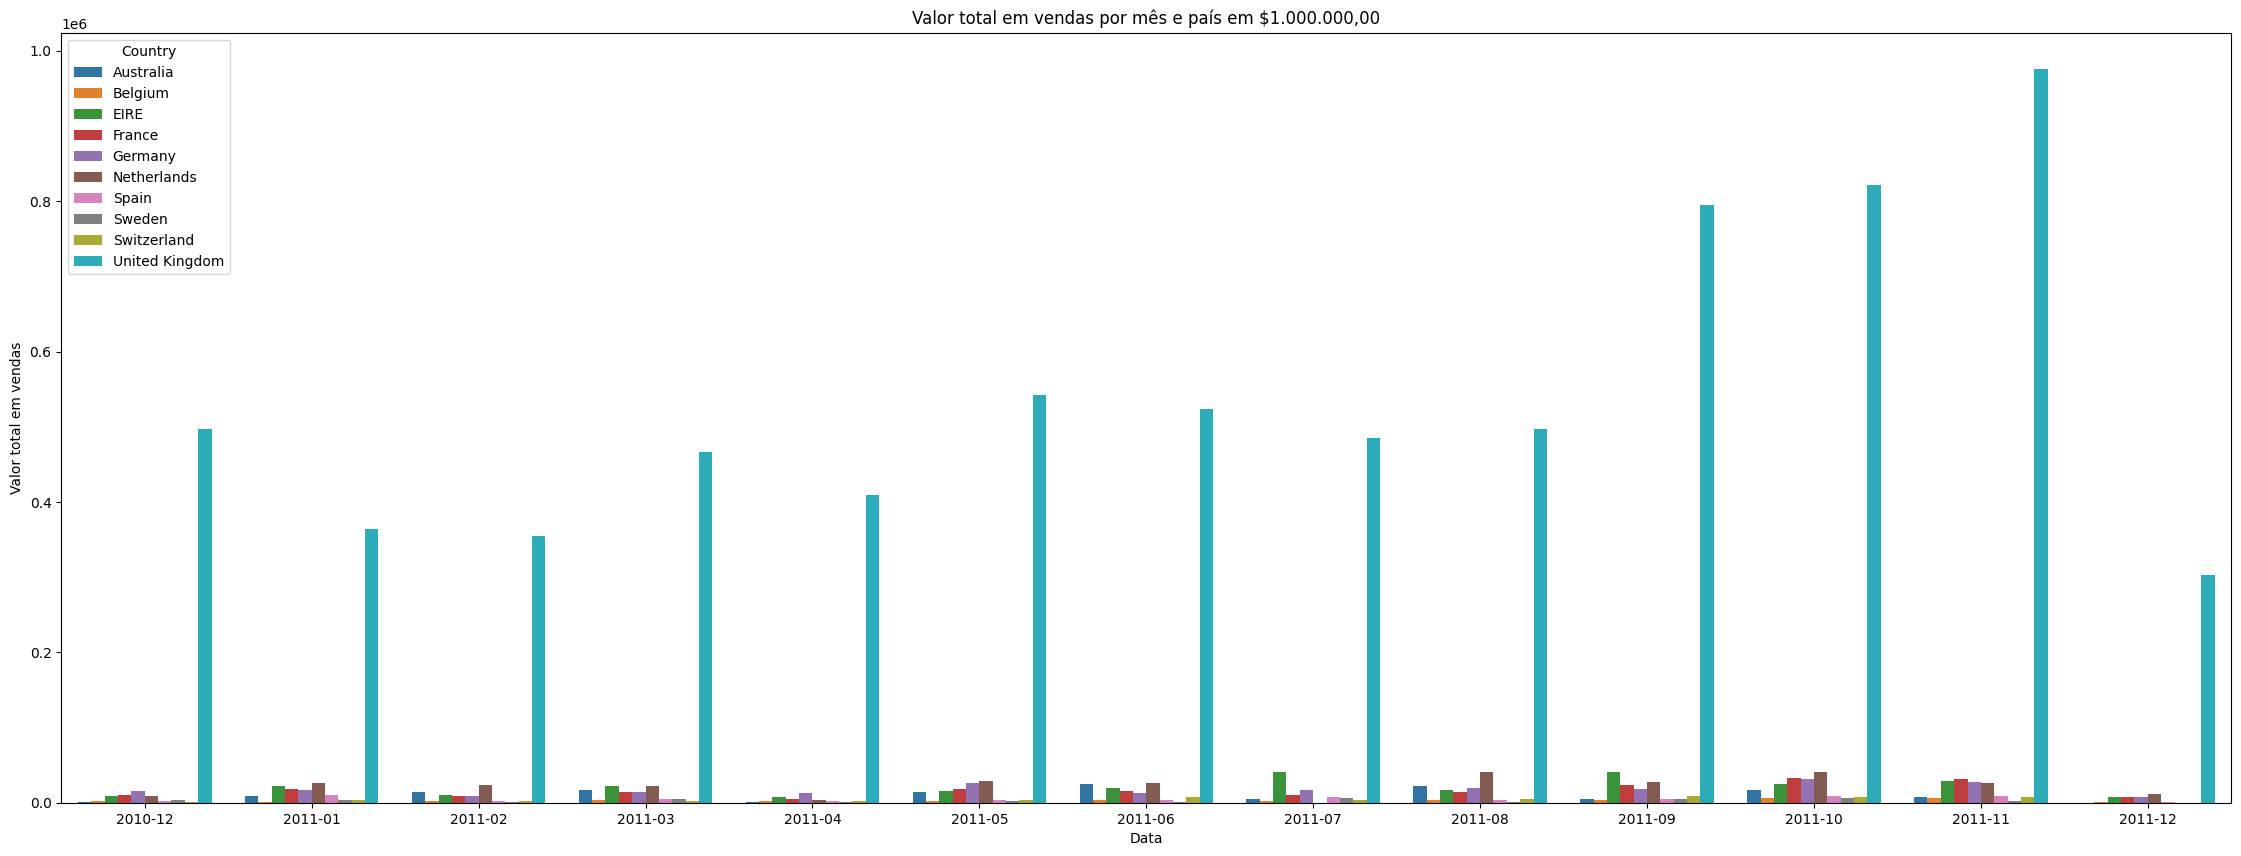

In [308]:
# Criar o gráfico de barras usando Seaborn
fig = plt.figure(figsize=(28,10))

sns.barplot(data=graph4, x='MesAno', y='TotalValue', hue='Country')

# Adicionar rótulos ao gráfico
plt.title('Valor total em vendas por mês e país em $1.000.000,00')
plt.xlabel('Data')
plt.ylabel('Valor total em vendas')
fig

# Exibir o gráfico
plt.show()

#Etapa 10

In [326]:
#Resumindo o valor total de cada pedido por cliente
df_final = df_clean.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'mean', 'TotalValue': 'sum'})
df_final['InvoiceDate'] = df_final['InvoiceDate'].dt.round('1s')
df_final

InvoiceDate  TotalValue
CustomerID InvoiceNo                                
12347      537626    2010-12-07 14:57:00      711.79
           542237    2011-01-26 14:30:00      475.39
           549222    2011-04-07 10:43:00      636.25
           556201    2011-06-09 13:01:00      382.52
           562032    2011-08-02 08:48:00      584.91
...                                  ...         ...
18283      579673    2011-11-30 12:59:00      220.31
           580872    2011-12-06 12:02:00      208.00
18287      554065    2011-05-22 10:39:00      765.28
           570715    2011-10-12 10:23:00     1001.32
           573167    2011-10-28 09:29:00       70.68

[18529 rows x 2 columns]

In [335]:
#Calculando RFM e tabelando
RFM = df_clean.groupby(['CustomerID']).agg({'Recency': 'max', 'Quantity': 'sum', 'TotalValue': 'mean'}).reset_index()
RFM = RFM.rename(columns={'CustomerID': 'Código de Cliente', 'Recency': 'Recência', 'Quantity': 'Frequência', 'TotalValue': 'Ticket Médio'})
RFM

,Código de Cliente,Recência,Frequência,Ticket Médio
0,12347,-2,2458,23.681319
1,12348,-75,2341,57.975484
2,12349,-19,631,24.076027
3,12350,-310,197,19.670588
4,12352,-36,536,29.482824
...,...,...,...,...
4332,18280,-278,45,18.060000
4333,18281,-181,54,11.545714
4334,18282,-8,103,14.837500
4335,18283,-4,1357,2.837074


No final do código sempre teremos a tabela calculada com o RFM de cada cliente.